# Setup

## Colab

In [1]:
# Mount the drive and move to dir
from google.colab import drive
drive.mount("/content/drive", force_remount = False)
%cd /content/drive/MyDrive/Coding/spread-res/runscr/

Mounted at /content/drive
/content/drive/MyDrive/Coding/spread-res/runscr


## Imports

In [ ]:
# Import importlib to reload modules and sys and os to add the path for other imports
import importlib
import os
import sys

import torch

# Append the parent directory to the path to import the necessary modules
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), "..")))

# Import the model architecture
from classes.models import BertPreTiny

# Import the utilities and the dataloader
from utils import inferutil, setuputil, trainutil

# Now reload the modules to ensure they are up-to-date
importlib.reload(setuputil)
importlib.reload(trainutil)
importlib.reload(inferutil)
importlib.reload(BertPreTiny)

# Import the model and funcs required from utils
from classes.models.BertPreTiny import BertPreTiny
from utils.inferutil import infer_full, infer_one
from utils.setuputil import display_config, setup_config
from utils.trainutil import train_model

## Configuration

device = cuda/mps:0 (env-specific), threads = 1 to inf (env-specific), seed = 0 to inf, data_dir = ../data, rows = 100, cols = 100, tokens = 32, save_dir = ../models/

In [ ]:
# Setup the config
input_config = {
    # Environment and Model Info
    "env": "colab",
    "approach": "bert",
    "model_name": "BertPreTiny",
    "model_base": "prajjwal1/bert-tiny",
    "data_ds": "100",
    # BERT Architecture Parameters
    "vocab_size": 30522,
    "hidden_size": 32,
    "num_hidden_layers": 1,
    "num_attention_heads": 1,
    "intermediate_size": 128,
    # Training Parameters
    "batch_size": 5,
    "lr": 1e-2,
    "mu": 0.25,
    "epochs": 20,
    "patience": 1,
    "save_int": 10,
}
config = setup_config(input_config)
display_config(config)

# Define local variables from the config dictionary
DEVICE = config["DEVICE"]
THREADS = config["THREADS"]

# Data loaders and vocab
train_loader = config["train_loader"]
val_loader = config["val_loader"]
test_loader = config["test_loader"]
tokenizer = config["tokenizer"]
model_base = config["model_base"]

# Training parameters
batch_size = config["batch_size"]
lr = config["lr"]
mu = config["mu"]
epochs = config["epochs"]
patience = config["patience"]
save_int = config["save_int"]
save_dir = config["save_dir"]
save_name = config["save_name"]

config.json:   0%|          | 0.00/285 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

Processing files: 100%|██████████| 40/40 [00:14<00:00,  2.80it/s]



40(P) = 40(G) + 0(E)


Processing files: 100%|██████████| 5/5 [00:00<00:00, 3118.91it/s]



5(P) = 5(G) + 0(E)


Processing files: 100%|██████████| 5/5 [00:00<00:00, 3568.41it/s]



5(P) = 5(G) + 0(E)

FINAL CONFIG:
{
  "env": "colab",
  "approach": "bert",
  "DEVICE": "<device>",
  "THREADS": 10,
  "seed": 0,
  "model_base": "prajjwal1/bert-tiny",
  "model_name": "BertPreTiny",
  "rows": 100,
  "cols": 100,
  "tokens": 32,
  "data_ds": "manual",
  "data_dir": "../data",
  "train_dir": "../data/manual_train",
  "val_dir": "../data/manual_val",
  "test_dir": "../data/manual_test",
  "tokenizer": "<BertTokenizerFast>",
  "vocab_size": 30522,
  "hidden_size": 32,
  "num_hidden_layers": 1,
  "num_attention_heads": 1,
  "intermediate_size": 128,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "attention_probs_dropout_prob": 0.1,
  "max_position_embeddings": 64,
  "type_vocab_size": 2,
  "initializer_range": 0.02,
  "layer_norm_eps": 1e-12,
  "pad_token_id": 0,
  "gradient_checkpointing": false,
  "train_loader": "<LoaderBert>",
  "val_loader": "<LoaderBert>",
  "test_loader": "<LoaderBert>",
  "batch_size": 5,
  "lr": 0.01,
  "mu": 0.25,
  "epochs": 20,
  "pat

# Model Training

In [ ]:
# Create and observe the model
untrained_model = BertPreTiny(config).to(DEVICE)
print(untrained_model)

pytorch_model.bin:   0%|          | 0.00/17.8M [00:00<?, ?B/s]

BertPreTiny(
  (bertModel_cell): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 128, padding_idx=0)
      (position_embeddings): Embedding(512, 128)
      (token_type_embeddings): Embedding(2, 128)
      (LayerNorm): LayerNorm((128,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-1): 2 x BertLayer(
          (attention): BertAttention(
            (self): BertSdpaSelfAttention(
              (query): Linear(in_features=128, out_features=128, bias=True)
              (key): Linear(in_features=128, out_features=128, bias=True)
              (value): Linear(in_features=128, out_features=128, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=128, out_features=128, bias=True)
              (LayerNorm): LayerNorm((128,), eps=1e-12, eleme

## Training Metrics

1. GPU Model: 521 mb
2. GPU Training: 36.7 gb

3. Per Epoch Train Time: 8m11s
4. Per Epoch Val Time: 21s
5. Last Epoch: 16


In [ ]:
# Train with adjusted batch size
trained_model = train_model(
    untrained_model,
    train_loader,
    val_loader,
    DEVICE,
    batch_size=batch_size,
    lr=lr,
    mu=mu,
    max_epochs=epochs,
    patience=patience,
    save_int=save_int,
    save_dir=save_dir,
    save_name=save_name,
    config=config,
)

Epoch 0


Validation Processing: 100%|██████████| 1/1 [00:21<00:00, 21.71s/it]


Train Loss: 1.2334e+00, Val Loss: 6.1833e-01


Epoch 1


Validation Processing: 100%|██████████| 1/1 [00:22<00:00, 22.14s/it]


Train Loss: 4.3360e-01, Val Loss: 2.6675e-01


Epoch 2


Validation Processing: 100%|██████████| 1/1 [00:22<00:00, 22.24s/it]


Train Loss: 2.3719e-01, Val Loss: 1.7173e-01


Epoch 3


Validation Processing: 100%|██████████| 1/1 [00:21<00:00, 21.87s/it]


Train Loss: 1.6250e-01, Val Loss: 1.1719e-01


Epoch 4


Validation Processing: 100%|██████████| 1/1 [00:21<00:00, 21.91s/it]


Train Loss: 1.3762e-01, Val Loss: 8.5275e-02


Epoch 5


Validation Processing: 100%|██████████| 1/1 [00:21<00:00, 21.90s/it]


Train Loss: 1.0104e-01, Val Loss: 7.0118e-02


Epoch 6


Validation Processing: 100%|██████████| 1/1 [00:21<00:00, 21.90s/it]


Train Loss: 6.9934e-02, Val Loss: 5.3496e-02


Epoch 7


Validation Processing: 100%|██████████| 1/1 [00:21<00:00, 21.86s/it]


Train Loss: 5.2716e-02, Val Loss: 4.2723e-02


Epoch 8


Validation Processing: 100%|██████████| 1/1 [00:22<00:00, 22.04s/it]


Train Loss: 4.5025e-02, Val Loss: 3.6500e-02


Epoch 9


Validation Processing: 100%|██████████| 1/1 [00:21<00:00, 21.89s/it]


Train Loss: 3.7074e-02, Val Loss: 3.2041e-02

Model Saved

Epoch 10


Validation Processing: 100%|██████████| 1/1 [00:22<00:00, 22.07s/it]


Train Loss: 3.1408e-02, Val Loss: 2.8605e-02


Epoch 11


Validation Processing: 100%|██████████| 1/1 [00:21<00:00, 21.99s/it]


Train Loss: 2.9748e-02, Val Loss: 2.6098e-02


Epoch 12


Validation Processing: 100%|██████████| 1/1 [00:21<00:00, 21.78s/it]


Train Loss: 2.6276e-02, Val Loss: 2.4071e-02


Epoch 13


Validation Processing: 100%|██████████| 1/1 [00:22<00:00, 22.02s/it]


Train Loss: 2.2253e-02, Val Loss: 2.2212e-02


Epoch 14


Validation Processing: 100%|██████████| 1/1 [00:21<00:00, 21.97s/it]


Train Loss: 2.1510e-02, Val Loss: 2.0904e-02


Epoch 15


Validation Processing: 100%|██████████| 1/1 [00:21<00:00, 21.70s/it]


Train Loss: 1.8694e-02, Val Loss: 1.8017e-02


Epoch 16


Validation Processing: 100%|██████████| 1/1 [00:21<00:00, 21.83s/it]


Train Loss: 1.7662e-02, Val Loss: 1.7184e-02


Epoch 17


Validation Processing: 100%|██████████| 1/1 [00:21<00:00, 21.96s/it]


Train Loss: 1.6242e-02, Val Loss: 1.6151e-02


Epoch 18


Validation Processing: 100%|██████████| 1/1 [00:22<00:00, 22.06s/it]


Train Loss: 1.4696e-02, Val Loss: 1.5386e-02


Epoch 19


Validation Processing: 100%|██████████| 1/1 [00:21<00:00, 21.83s/it]


Train Loss: 1.3938e-02, Val Loss: 1.4724e-02

Model Saved


TRAINING DONE at epoch 19, best epoch 19
Train Loss = 0.013937639887444675, Perplexity = 1.0000002787528366
Val Loss = 0.014724005945026875, Perplexity = 1.0000002944801623


# Evaluation

In [ ]:
# Params
loc = 0
thresh = 0.9939
infer_batch_size = 40

## Single Example


Filename: ../data/manual_train/dlportfoliobydelinquencystatus.xls

--- Unique Sigmoid Probabilities for Bold Cells ---
(39,10): 0.993344 | (39,9): 0.993378 | (39,11): 0.993415 | (39,12): 0.993493 | (39,8): 0.993522 | (39,13): 0.993532 | (39,7): 0.993695 | (39,6): 0.993831 | (39,0): 0.993894 | (39,5): 0.993913 | (39,1): 0.993951 | (37,0): 0.993952 | (36,0): 0.993956 | (39,4): 0.993958 | (35,0): 0.993958 | (34,0): 0.993971 | (39,2): 0.993975 | (29,0): 0.993977 | (39,3): 0.993978 | (30,0): 0.993979 | (33,0): 0.993986 | (31,0): 0.993987 | (28,0): 0.993989 | (32,0): 0.993991 | (36,1): 0.993995 | (29,1): 0.993996 | (35,1): 0.993997 | (28,1): 0.993999 | (30,1): 0.994003 | (0,0): 0.994004 | (27,0): 0.994005 | (34,1): 0.994008 | (27,1): 0.994008 | (26,0): 0.994013 | (31,1): 0.994014 | (26,1): 0.994014 | (25,0): 0.994016 | (21,0): 0.994017 | (22,0): 0.994017 | (33,1): 0.994019 | (24,0): 0.994019 | (25,1): 0.994020 | (21,1): 0.994020 | (32,1): 0.994020 | (23,0): 0.994021 | (0,1): 0.994022 | (22,

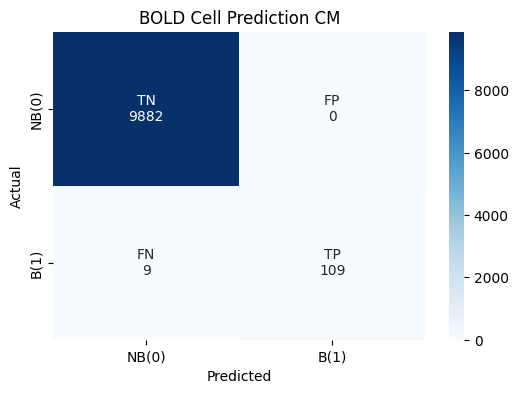


--- Predicted Grid (1 = Bold, 0 = Not Bold) ---


,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1,1,1,1,1,1,1,1,1,1,1,1,1,1
4,0,0,1,1,1,1,1,1,1,1,1,1,1,1
5,1,1,1,1,1,1,1,1,1,1,1,1,1,1
6,1,1,0,0,0,0,0,0,0,0,0,0,0,0
7,1,1,0,0,0,0,0,0,0,0,0,0,0,0
8,1,1,0,0,0,0,0,0,0,0,0,0,0,0
9,1,1,0,0,0,0,0,0,0,0,0,0,0,0
10,1,1,0,0,0,0,0,0,0,0,0,0,0,0
11,1,1,0,0,0,0,0,0,0,0,0,0,0,0
12,1,1,0,0,0,0,0,0,0,0,0,0,0,0



--- Actual Grid (1 = Bold, 0 = Not Bold) ---


,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1,1,1,1,1,1,1,1,1,1,1,1,1,1
4,0,0,1,1,1,1,1,1,1,1,1,1,1,1
5,1,1,1,1,1,1,1,1,1,1,1,1,1,1
6,1,1,0,0,0,0,0,0,0,0,0,0,0,0
7,1,1,0,0,0,0,0,0,0,0,0,0,0,0
8,1,1,0,0,0,0,0,0,0,0,0,0,0,0
9,1,1,0,0,0,0,0,0,0,0,0,0,0,0
10,1,1,0,0,0,0,0,0,0,0,0,0,0,0
11,1,1,0,0,0,0,0,0,0,0,0,0,0,0
12,1,1,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Inference on single position of train_loader
infer_one(
    trained_model=trained_model,
    infer_loader=train_loader,
    loc=loc,
    threshold=thresh,
    device=DEVICE,
    approach=config["approach"],
    disp_sig=True,
)


Filename: ../data/manual_val/ffelbydefermenttype.xls

--- Unique Sigmoid Probabilities for Bold Cells ---
(29,0): 0.993977 | (30,0): 0.993979 | (31,0): 0.993986 | (28,0): 0.993989 | (32,0): 0.993991 | (29,1): 0.993996 | (28,1): 0.993999 | (0,0): 0.994003 | (27,0): 0.994006 | (27,1): 0.994008 | (26,0): 0.994013 | (31,1): 0.994014 | (26,1): 0.994014 | (25,0): 0.994016 | (21,0): 0.994017 | (22,0): 0.994017 | (24,0): 0.994019 | (25,1): 0.994020 | (21,1): 0.994020 | (23,0): 0.994021 | (0,1): 0.994021 | (22,1): 0.994024 | (24,1): 0.994027 | (13,1): 0.994028 | (23,1): 0.994030 | (20,0): 0.994031 | (0,13): 0.994033 | (20,1): 0.994033 | (14,1): 0.994035 | (6,14): 0.994035 | (6,13): 0.994036 | (0,2): 0.994036 | (6,8): 0.994037 | (14,0): 0.994040 | (0,14): 0.994040 | (6,9): 0.994043 | (5,13): 0.994045 | (6,7): 0.994046 | (0,3): 0.994048 | (6,17): 0.994048 | (6,16): 0.994048 | (6,15): 0.994049 | (0,6): 0.994051 | (0,5): 0.994051 | (0,4): 0.994051 | (6,0): 0.994051 | (12,1): 0.994052 | (19,0): 0.9

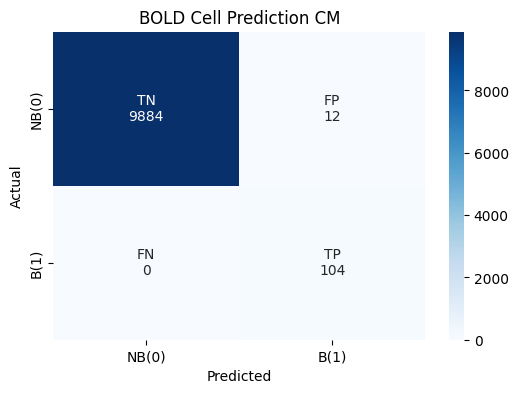


--- Predicted Grid (1 = Bold, 0 = Not Bold) ---


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
5,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
6,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
7,1,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0
8,1,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0
9,1,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0
10,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
11,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
12,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
13,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0



--- Actual Grid (1 = Bold, 0 = Not Bold) ---


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
5,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
6,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
7,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
10,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
11,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
12,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
13,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Inference on single position of val_loader
infer_one(
    trained_model=trained_model,
    infer_loader=val_loader,
    loc=loc,
    threshold=thresh,
    device=DEVICE,
    approach=config["approach"],
    disp_sig=True,
)


Filename: ../data/manual_test/dlportfoliobyrepaymentplan.xls

--- Unique Sigmoid Probabilities for Bold Cells ---
(5,9): 0.005144 | (5,7): 0.005215 | (5,8): 0.005325 | (5,6): 0.005662 | (38,0): 0.993931 | (37,0): 0.993952 | (36,0): 0.993957 | (35,0): 0.993958 | (34,0): 0.993971 | (38,1): 0.993972 | (29,0): 0.993977 | (30,0): 0.993979 | (33,0): 0.993986 | (31,0): 0.993987 | (28,0): 0.993988 | (37,1): 0.993989 | (6,21): 0.993991 | (36,1): 0.993995 | (29,1): 0.993995 | (35,1): 0.993998 | (28,1): 0.993999 | (30,1): 0.994003 | (0,0): 0.994004 | (27,0): 0.994005 | (34,1): 0.994008 | (27,1): 0.994008 | (26,0): 0.994013 | (31,1): 0.994014 | (26,1): 0.994014 | (25,0): 0.994015 | (0,21): 0.994016 | (21,0): 0.994017 | (22,0): 0.994017 | (33,1): 0.994019 | (24,0): 0.994019 | (25,1): 0.994020 | (21,1): 0.994020 | (23,0): 0.994021 | (0,1): 0.994022 | (6,20): 0.994023 | (22,1): 0.994024 | (24,1): 0.994027 | (13,1): 0.994029 | (0,20): 0.994030 | (23,1): 0.994031 | (20,0): 0.994031 | (5,21): 0.994031 

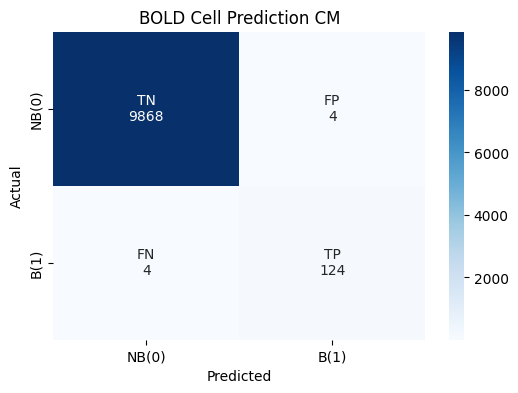


--- Predicted Grid (1 = Bold, 0 = Not Bold) ---


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21
0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
5,0,0,1,1,1,1,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1
6,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
7,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0
8,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
9,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
10,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
11,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
12,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
13,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0



--- Actual Grid (1 = Bold, 0 = Not Bold) ---


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21
0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
5,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
6,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
7,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
10,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
11,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
12,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
13,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Inference on single position of test_loader
infer_one(
    trained_model=trained_model,
    infer_loader=test_loader,
    loc=loc,
    threshold=thresh,
    device=DEVICE,
    approach=config["approach"],
    disp_sig=True,
)

## All Examples

Batch Inference: 100%|██████████| 1/1 [00:21<00:00, 21.42s/it]


--- Aggregated Metrics Across All Batches ---

NB to B ratio: Predicted = 396750:3250 | Actual = 396714:3286
Accuracy: 99.97% | Precision: 98.95% | Recall: 97.87% | F1-Score: 0.98



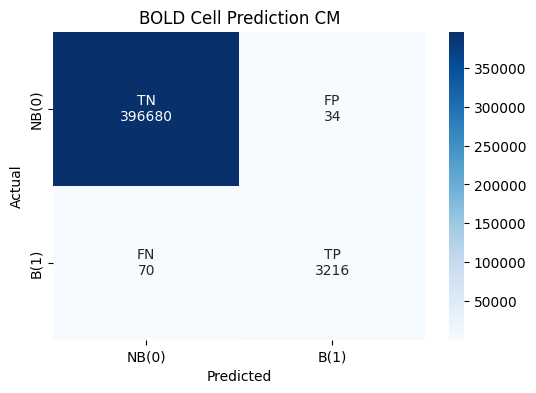

In [ ]:
# Infer across all examples of train_loader
infer_full(
    trained_model=trained_model,
    infer_loader=train_loader,
    batch_size=infer_batch_size,
    threshold=thresh,
    device=DEVICE,
    approach=config["approach"],
)

Batch Inference: 100%|██████████| 1/1 [00:20<00:00, 20.72s/it]


--- Aggregated Metrics Across All Batches ---

NB to B ratio: Predicted = 49556:444 | Actual = 49602:398
Accuracy: 99.91% | Precision: 89.64% | Recall: 100.00% | F1-Score: 0.95



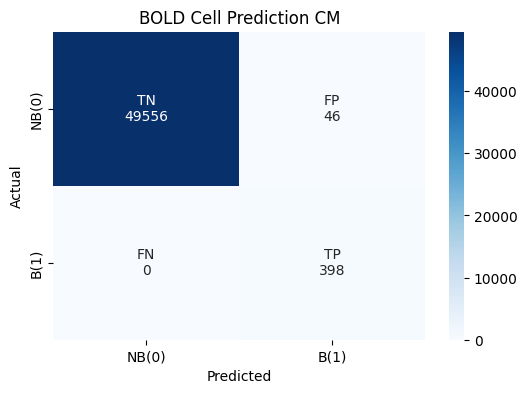

In [ ]:
# Infer across all examples of val_loader
infer_full(
    trained_model=trained_model,
    infer_loader=val_loader,
    batch_size=infer_batch_size,
    threshold=0.9331,
    device=DEVICE,
    approach=config["approach"],
)

Batch Inference: 100%|██████████| 1/1 [00:20<00:00, 20.79s/it]


--- Aggregated Metrics Across All Batches ---

NB to B ratio: Predicted = 49602:398 | Actual = 49606:394
Accuracy: 99.98% | Precision: 97.99% | Recall: 98.98% | F1-Score: 0.98



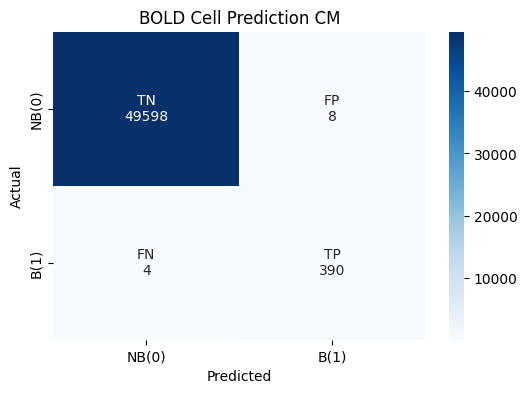

In [ ]:
# Infer across all examples of test_loader
infer_full(
    trained_model=trained_model,
    infer_loader=test_loader,
    batch_size=infer_batch_size,
    threshold=thresh,
    device=DEVICE,
    approach=config["approach"],
)